In [411]:
import pandas as pd
import seaborn as sns
from scipy.integrate import cumtrapz
from scipy.signal import butter, filtfilt, periodogram, spectrogram, find_peaks
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})
import numpy as np

In [412]:
df = pd.read_csv("../data/slow-walking.csv", header=None)
df.columns = ["time", "aX", "aY", "aZ", "gX", "gY", "gZ"]

<AxesSubplot:xlabel='time', ylabel='aZ'>

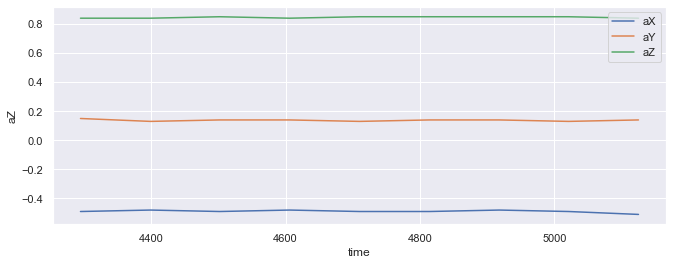

In [413]:
_df = df.iloc[:9]
sns.lineplot(x=_df.time, y=_df.aX, label="aX")
sns.lineplot(x=_df.time, y=_df.aY, label="aY")
sns.lineplot(x=_df.time, y=_df.aZ, label="aZ")

In [414]:
gravity_vector = _df.loc[:,["aX", "aY", "aZ"]].mean()
(gravity_vector, (gravity_vector**2).sum())

(aX   -0.488889
 aY    0.137778
 aZ    0.845556
 dtype: float64,
 0.9729592592592589)

<AxesSubplot:xlabel='time', ylabel='aZ'>

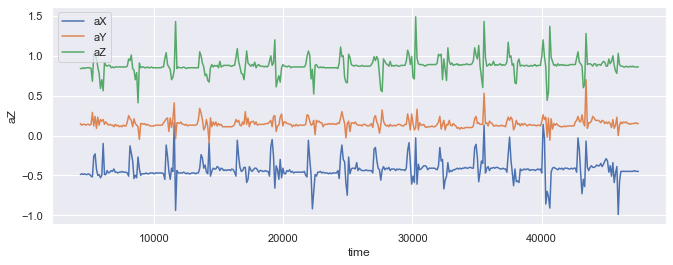

In [415]:
sns.lineplot(x=df.time, y=df.aX, label="aX")
sns.lineplot(x=df.time, y=df.aY, label="aY")
sns.lineplot(x=df.time, y=df.aZ, label="aZ")

In [416]:
def low_pass(data, fc, fs = 10):
    w = fc / (fs / 2) # Normalize the frequency
    b, a = butter(5, w, 'low')
    return filtfilt(b, a, data)


In [417]:
df.loc[:,["aX", "aY", "aZ"]] = (df.loc[:,["aX", "aY", "aZ"]] - gravity_vector) * 9.8

In [434]:
df.loc[:,"aMagintude"] = (df.loc[:,["aX", "aY", "aZ"]]**2).sum(axis=1)
df.aMagintude = low_pass(df.aMagintude, 1.0)

17

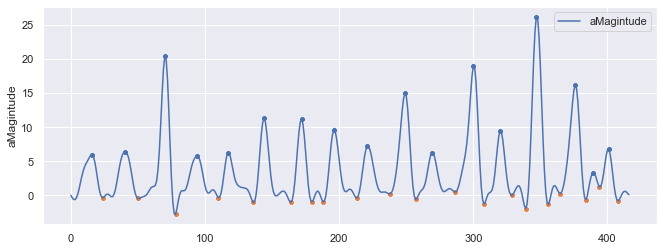

In [435]:
peaks, _ = find_peaks(df.aMagintude, prominence=2, distance=3)
neg_peaks, _ = find_peaks(-df.aMagintude, prominence=1)
df.aMagintude.plot()
sns.scatterplot(data=df.iloc[peaks], x=peaks, y="aMagintude")
sns.scatterplot(data=df.iloc[neg_peaks], x=neg_peaks, y="aMagintude")
len(peaks)

16.571318944844126

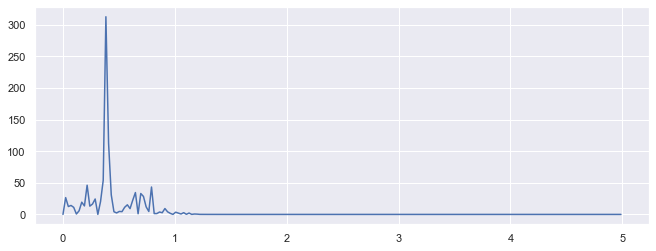

In [436]:
f, Pxx = periodogram(df.aMagintude, fs=10.0)
sns.lineplot(f, Pxx)
(df.time.max() - df.time.min()) * f[np.argmax(Pxx)] / 1000

8

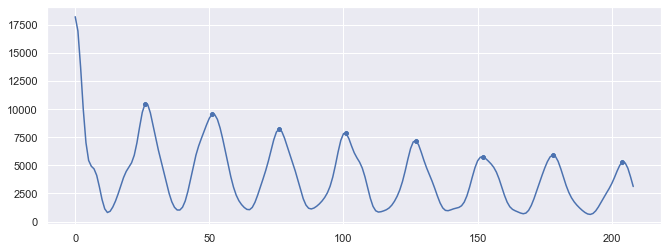

In [373]:
def autocorr(x):
    result = np.correlate(x, x, mode='same')
    return result[int(result.size/2):]

corr = autocorr(df.aMagintude)
sns.lineplot(x=range(len(corr)), y=corr)
peaks, _ = find_peaks(corr)
sns.scatterplot(x=peaks, y=corr[peaks])
len(peaks)

<AxesSubplot:xlabel='time', ylabel='gZ'>

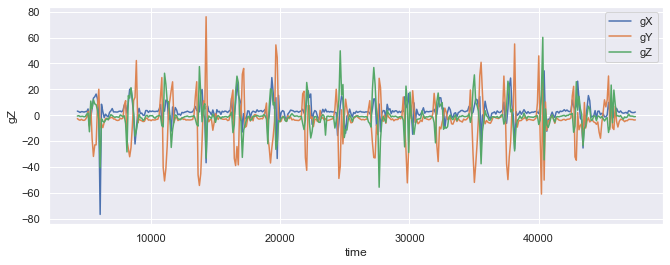

In [386]:
sns.lineplot(x=df.time, y=df.gX, label="gX")
sns.lineplot(x=df.time, y=df.gY, label="gY")
sns.lineplot(x=df.time, y=df.gZ, label="gZ")

In [439]:
df.loc[:,"gMagintude"] = (df.loc[:,["gX", "gY", "gZ"]]**2).sum(axis=1)
df.gMagintude = low_pass(df.gMagintude, 1.5)

16

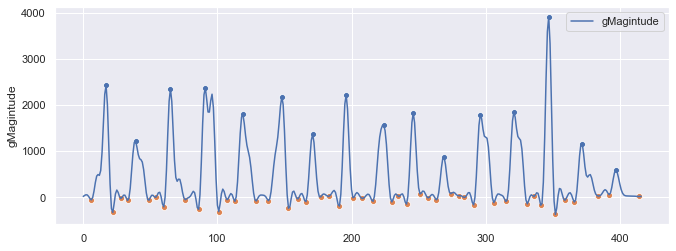

In [440]:
peaks, _ = find_peaks(df.gMagintude, prominence=500, height=(100,None))
neg_peaks, _ = find_peaks(-df.gMagintude, height=(-100,None))
df.gMagintude.plot()
sns.scatterplot(data=df.iloc[peaks], x=peaks, y="gMagintude")
sns.scatterplot(data=df.iloc[neg_peaks], x=neg_peaks, y="gMagintude")
len(peaks)

16.571318944844126

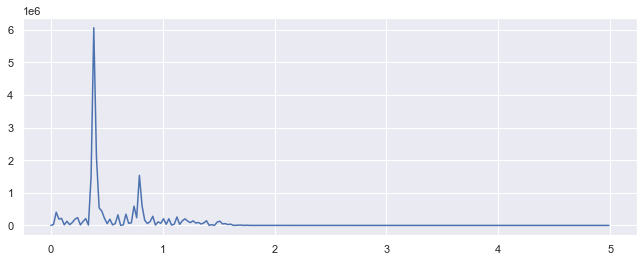

In [389]:
f, Pxx = periodogram(df.gMagintude, fs=10.0)
sns.lineplot(f, Pxx)
(df.time.max() - df.time.min()) * f[np.argmax(Pxx)] / 1000

18

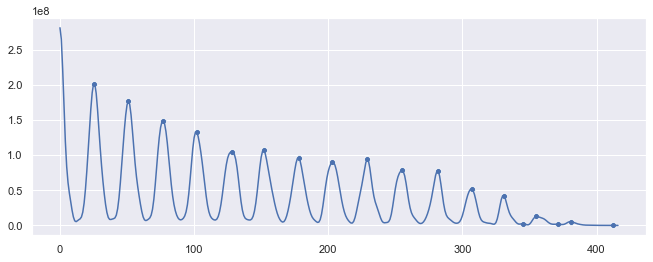

In [409]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[int(result.size/2):]

corr = autocorr(df.gMagintude)
sns.lineplot(x=range(len(corr)), y=corr)
peaks, _ = find_peaks(corr)
sns.scatterplot(x=peaks, y=corr[peaks])
len(peaks)